# Poker Hand Classification

## Dataset Collection

In [1]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
poker_hand = fetch_ucirepo(id=158) 
  
# data (as pandas dataframes) 
X = poker_hand.data.features 
y = poker_hand.data.targets 
  
# metadata 
print(poker_hand.metadata) 
  
# variable information 
print(poker_hand.variables) 


{'uci_id': 158, 'name': 'Poker Hand', 'repository_url': 'https://archive.ics.uci.edu/dataset/158/poker+hand', 'data_url': 'https://archive.ics.uci.edu/static/public/158/data.csv', 'abstract': 'Purpose is to predict poker hands', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1025010, 'num_features': 10, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['CLASS'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2002, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5KW38', 'creators': ['Robert Cattral', 'Franz Oppacher'], 'intro_paper': None, 'additional_info': {'summary': 'Each record is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. There is one Class attribute that describes the "Poker Hand". T

## Data Pre-Processing

Number of duplicate rows dropped: 2239
Number of missing values in each column:
S1    0
C1    0
S2    0
C2    0
S3    0
C3    0
S4    0
C4    0
S5    0
C5    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1022771 entries, 0 to 1025009
Data columns (total 10 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   S1      1022771 non-null  int64
 1   C1      1022771 non-null  int64
 2   S2      1022771 non-null  int64
 3   C2      1022771 non-null  int64
 4   S3      1022771 non-null  int64
 5   C3      1022771 non-null  int64
 6   S4      1022771 non-null  int64
 7   C4      1022771 non-null  int64
 8   S5      1022771 non-null  int64
 9   C5      1022771 non-null  int64
dtypes: int64(10)
memory usage: 85.8 MB
None


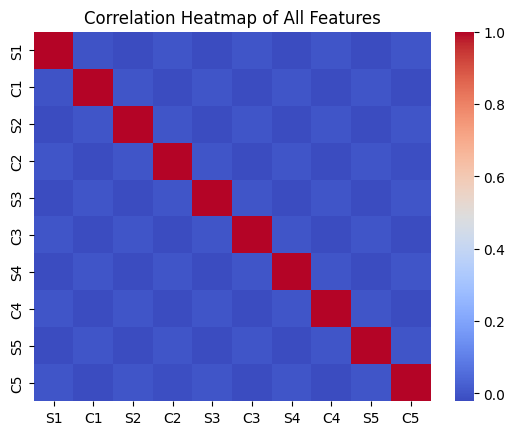

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop duplicate rows
indexes_to_drop = X[X.duplicated()].index
X = X.drop(indexes_to_drop)
y = y.drop(indexes_to_drop)
print('Number of duplicate rows dropped:', len(indexes_to_drop))

# Check for missing values
missing_values = X.isnull().sum()
print('Number of missing values in each column:')
print(missing_values)

# Print dataset information
print(X.info())

corr_mat = X.corr()
X.head()
sns.heatmap(corr_mat, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of All Features')
plt.show()

## Train using Logistic Regression, Decision Tree, Random Forest, Naive Bayes

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

results = []

models = [
    ("Logistic Regression", LogisticRegression(max_iter=10000, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Naive Bayes", GaussianNB())
]

for model_name, model in models:
    fit_start_datetime = datetime.now()
    print(f'Training "{model_name}"...')
    model.fit(X_train, y_train)
    fit_duration = (datetime.now() - fit_start_datetime).total_seconds()
    print(f'Finished in {fit_duration} seconds.')
    y_hat = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_hat)
    print(f'Accuracy: {accuracy}')
    print()
    results.append({
        "name": model_name,
        "accuracy": accuracy,
        "f1_score": f1_score(y_test, y_hat, average='weighted'),
        "precision": precision_score(y_test, y_hat, average='weighted'),
        "recall": recall_score(y_test, y_hat, average='weighted'),
        "fit_duration_seconds": fit_duration
    })

for result in results:
    print(f'# {result["name"]}')
    print(f'    Accuracy: {result["accuracy"]}')
    print(f'    F1 Score: {result["f1_score"]}')
    print(f'    Precision: {result["precision"]}')
    print(f'    Recall: {result["recall"]}')
    print(f'    Fit Duration: {result["fit_duration_seconds"]}s')
    print()

Training "Logistic Regression"...


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Finished in 236.532971 seconds.
Accuracy: 0.5007887052197946



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training "Decision Tree"...
Finished in 3.631775 seconds.
Accuracy: 0.6342786932262606

Training "Random Forest"...


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished in 149.321852 seconds.
Accuracy: 0.7470374667570527



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training "Naive Bayes"...
Finished in 0.187368 seconds.
Accuracy: 0.5007887052197946

# Logistic Regression
    Accuracy: 0.5007887052197946
    F1 Score: 0.33421004089844814
    Precision: 0.2507893272757183
    Recall: 0.5007887052197946
    Fit Duration: 236.532971s

# Decision Tree
    Accuracy: 0.6342786932262606
    F1 Score: 0.6363432839565742
    Precision: 0.6386340170569552
    Recall: 0.6342786932262606
    Fit Duration: 3.631775s

# Random Forest
    Accuracy: 0.7470374667570527
    F1 Score: 0.7186430345343224
    Precision: 0.737284440033064
    Recall: 0.7470374667570527
    Fit Duration: 149.321852s

# Naive Bayes
    Accuracy: 0.5007887052197946
    F1 Score: 0.33421004089844814
    Precision: 0.2507893272757183
    Recall: 0.5007887052197946
    Fit Duration: 0.187368s



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Train using SVM (specifically LinearSVC)
This is optional since it takes too long and is the worst performing model even with LinearSVC. (1447 seconds on my machine, roughly 25~ minutes)

In [5]:
# additionally try SVM
from sklearn.svm import LinearSVC
model = LinearSVC(random_state=42)
fit_start_datetime = datetime.now()
print(f'Training "LinearSVC"...')
model.fit(X_train, y_train)
fit_duration = (datetime.now() - fit_start_datetime).total_seconds()
print(f'Finished in {fit_duration} seconds.')
y_hat = model.predict(X_test)
accuracy = accuracy_score(y_test, y_hat)
print(f'Accuracy: {accuracy}')
print()
result = {
    "name": "LinearSVC",
    "accuracy": accuracy,
    "f1_score": f1_score(y_test, y_hat, average='weighted'),
    "precision": precision_score(y_test, y_hat, average='weighted'),
    "recall": recall_score(y_test, y_hat, average='weighted'),
    "fit_duration_seconds": fit_duration
} 
results.append(result)
print(f'# {result["name"]}')
print(f'    Accuracy: {result["accuracy"]}')
print(f'    F1 Score: {result["f1_score"]}')
print(f'    Precision: {result["precision"]}')
print(f'    Recall: {result["recall"]}')
print(f'    Fit Duration: {result["fit_duration_seconds"]}s')
print()


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training "LinearSVC"...


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Finished in 1419.420144 seconds.
Accuracy: 0.5007887052197946

# LinearSVC
    Accuracy: 0.5007887052197946
    F1 Score: 0.33421004089844814
    Precision: 0.2507893272757183
    Recall: 0.5007887052197946
    Fit Duration: 1419.420144s



## Model Selection
We select best model by ranking the models for each metric (Accuracy, Precision, Recall, and F1).
Using this ranking, we vote on which is best based on occurrence of being the best on each metric.

In [6]:
from collections import Counter

def most_common(lst):
    data = Counter(lst)
    return max(lst, key=data.get)

best_model_voting_pool = []

# get the best model in terms of accuracy
best_accuracy_model = max(results, key=lambda x: x["accuracy"])
best_model_voting_pool.append(best_accuracy_model["name"])
print(f'Best Model in terms of accuracy: {best_accuracy_model["name"]} @ {best_accuracy_model["accuracy"]} accuracy')

# get the best model in terms of precision
best_precision_model = max(results, key=lambda x: x["precision"])
best_model_voting_pool.append(best_precision_model["name"])
print(f'Best Model in terms of precision: {best_precision_model["name"]} @ {best_precision_model["precision"]} precision')

# get the best model in terms of recall
best_recall_model = max(results, key=lambda x: x["recall"])
best_model_voting_pool.append(best_recall_model["name"])
print(f'Best Model in terms of recall: {best_recall_model["name"]} @ {best_recall_model["recall"]} recall')

# get the best model in terms of f1 score
best_f1_score_model = max(results, key=lambda x: x["f1_score"])
best_model_voting_pool.append(best_f1_score_model["name"])
print(f'Best Model in terms of f1 score: {best_f1_score_model["name"]} @ {best_f1_score_model["f1_score"]} f1 score')

# get the best model by voting
best_model_name = most_common(best_model_voting_pool)
print(f'Best Model by voting: {best_model_name}')


Best Model in terms of accuracy: Random Forest @ 0.7470374667570527 accuracy
Best Model in terms of precision: Random Forest @ 0.737284440033064 precision
Best Model in terms of recall: Random Forest @ 0.7470374667570527 recall
Best Model in terms of f1 score: Random Forest @ 0.7186430345343224 f1 score
Best Model by voting: Random Forest


## Ensembling

In [7]:
# ensemble methods
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, BaggingClassifier

best_model = None
for model in models:
    if model[0] == best_model_name:
        best_model = model[1]
        break

ensemble_methods = [
    ("Stacking Ensemble", StackingClassifier(estimators=[("best_model", best_model)], final_estimator=LogisticRegression(max_iter=10000, random_state=42))),
    ("AdaBoost Ensemble", AdaBoostClassifier(estimator=best_model, random_state=42)),
    ("Bagging Ensemble", BaggingClassifier(estimator=best_model, random_state=42))
]

ensemble_results = []

for ensemble_method, ensemble_model in ensemble_methods:
    fit_start_datetime = datetime.now()
    print(f'Training "{ensemble_method}"...')
    ensemble_model.fit(X_train, y_train)
    fit_duration = (datetime.now() - fit_start_datetime).total_seconds()
    print(f'Finished in {fit_duration} seconds.')
    y_hat = ensemble_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_hat)
    print(f'Accuracy: {accuracy}')
    print()
    ensemble_results.append({
        "name": ensemble_method,
        "accuracy": accuracy,
        "f1_score": f1_score(y_test, y_hat, average='weighted'),
        "precision": precision_score(y_test, y_hat, average='weighted'),
        "recall": recall_score(y_test, y_hat, average='weighted'),
        "fit_duration_seconds": fit_duration
    })

for result in ensemble_results:
    print(f'{result["name"]}: {result["accuracy"]} ({result["fit_duration_seconds"]}s)')

Training "Stacking Ensemble"...


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Finished in 744.861855 seconds.
Accuracy: 0.7818643427021953



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training "AdaBoost Ensemble"...
Finished in 178.674768 seconds.
Accuracy: 0.7495469833654899



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training "Bagging Ensemble"...
Finished in 961.82982 seconds.
Accuracy: 0.7470700578818377



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Stacking Ensemble: 0.7818643427021953 (744.861855s)
AdaBoost Ensemble: 0.7495469833654899 (178.674768s)
Bagging Ensemble: 0.7470700578818377 (961.82982s)


## Visualization

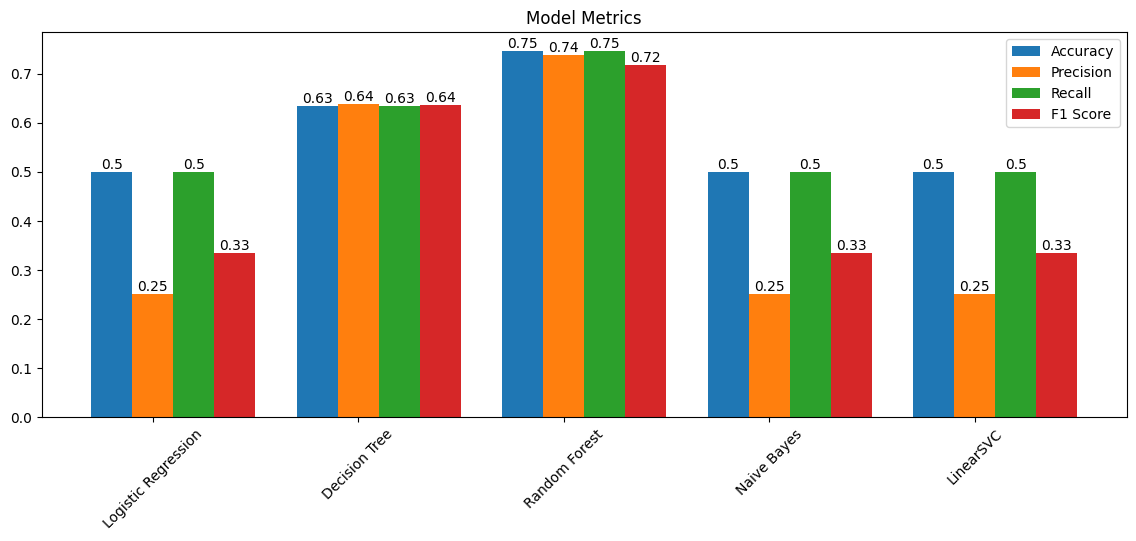

In [8]:
# graph results via bar chart for accuracy, precision, recall, and f1 score
import matplotlib.pyplot as plt

labels = [result["name"] for result in results]
accuracy = [result["accuracy"] for result in results]
precision = [result["precision"] for result in results]
recall = [result["recall"] for result in results]
f1_score = [result["f1_score"] for result in results]

x = range(len(labels))

fig, ax = plt.subplots(figsize=(14, 5))
bar_width = 0.2
b1 = ax.bar(x, accuracy, width=bar_width, label='Accuracy')
b2 = ax.bar([i + bar_width for i in x], precision, width=bar_width, label='Precision')
b3 = ax.bar([i + bar_width * 2 for i in x], recall, width=bar_width, label='Recall')
b4 = ax.bar([i + bar_width * 3 for i in x], f1_score, width=bar_width, label='F1 Score')

for i in range(len(x)):
    ax.text(i, accuracy[i], round(accuracy[i], 2), ha='center', va='bottom')
    ax.text(i + bar_width, precision[i], round(precision[i], 2), ha='center', va='bottom')
    ax.text(i + bar_width * 2, recall[i], round(recall[i], 2), ha='center', va='bottom')
    ax.text(i + bar_width * 3, f1_score[i], round(f1_score[i], 2), ha='center', va='bottom')

ax.set_xticks([i + bar_width for i in x])
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.title('Model Metrics')
plt.show()

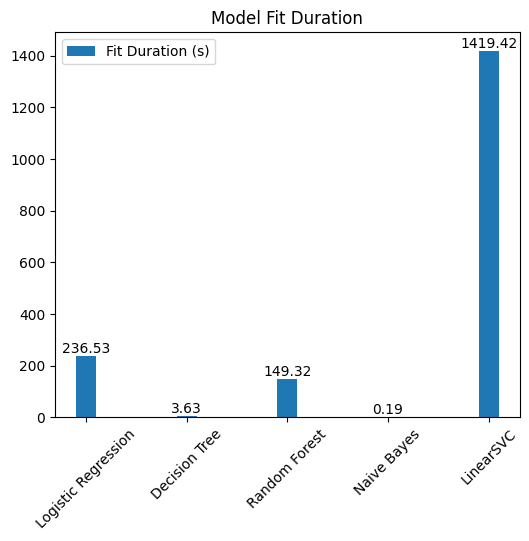

In [9]:
# graph results via bar chart for fit duration
labels = [result["name"] for result in results]
fit_duration_seconds = [result["fit_duration_seconds"] for result in results]

x = range(len(labels))

fig, ax = plt.subplots(figsize=(6, 5))
bar_width = 0.2
b1 = ax.bar(x, fit_duration_seconds, width=bar_width, label='Fit Duration (s)')
for i in range(len(x)):
    ax.text(i, fit_duration_seconds[i], round(fit_duration_seconds[i], 2), ha='center', va='bottom')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.title('Model Fit Duration')
plt.show()

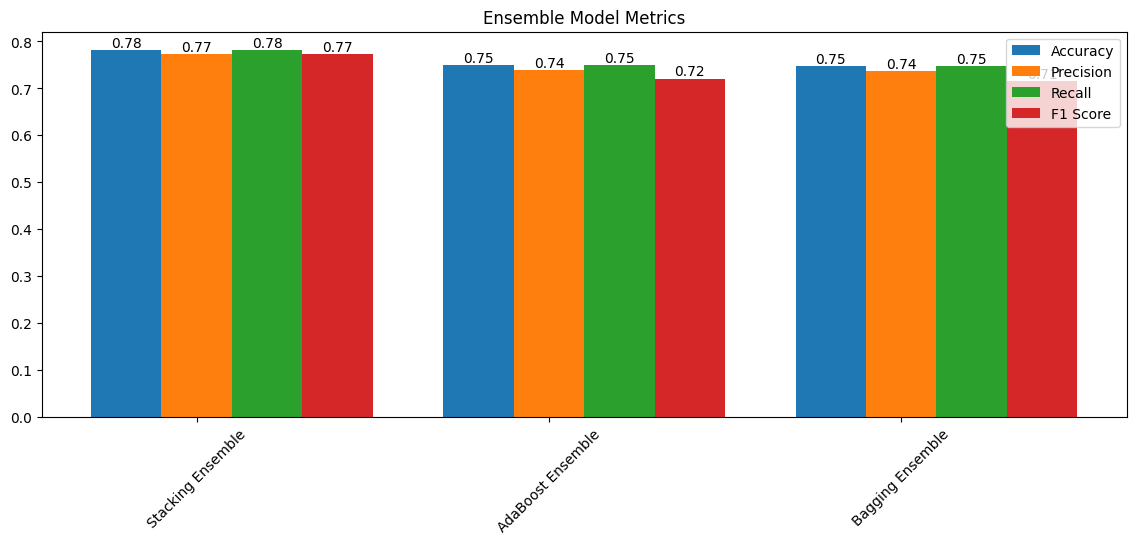

In [10]:
# graph ensemble results via bar chart for accuracy, precision, recall, and f1 score

ensemble_labels = [result["name"] for result in ensemble_results]
ensemble_accuracy = [result["accuracy"] for result in ensemble_results]
ensemble_precision = [result["precision"] for result in ensemble_results]
ensemble_recall = [result["recall"] for result in ensemble_results]
ensemble_f1_score = [result["f1_score"] for result in ensemble_results]

x = range(len(ensemble_labels))

fig, ax = plt.subplots(figsize=(14, 5))
bar_width = 0.2
b1 = ax.bar(x, ensemble_accuracy, width=bar_width, label='Accuracy')
b2 = ax.bar([i + bar_width for i in x], ensemble_precision, width=bar_width, label='Precision')
b3 = ax.bar([i + bar_width * 2 for i in x], ensemble_recall, width=bar_width, label='Recall')
b4 = ax.bar([i + bar_width * 3 for i in x], ensemble_f1_score, width=bar_width, label='F1 Score')

for i in range(len(x)):
    ax.text(i, ensemble_accuracy[i], round(ensemble_accuracy[i], 2), ha='center', va='bottom')
    ax.text(i + bar_width, ensemble_precision[i], round(ensemble_precision[i], 2), ha='center', va='bottom')
    ax.text(i + bar_width * 2, ensemble_recall[i], round(ensemble_recall[i], 2), ha='center', va='bottom')
    ax.text(i + bar_width * 3, ensemble_f1_score[i], round(ensemble_f1_score[i], 2), ha='center', va='bottom')

ax.set_xticks([i + bar_width for i in x])
ax.set_xticklabels(ensemble_labels, rotation=45)
ax.legend()
plt.title('Ensemble Model Metrics')
plt.show()

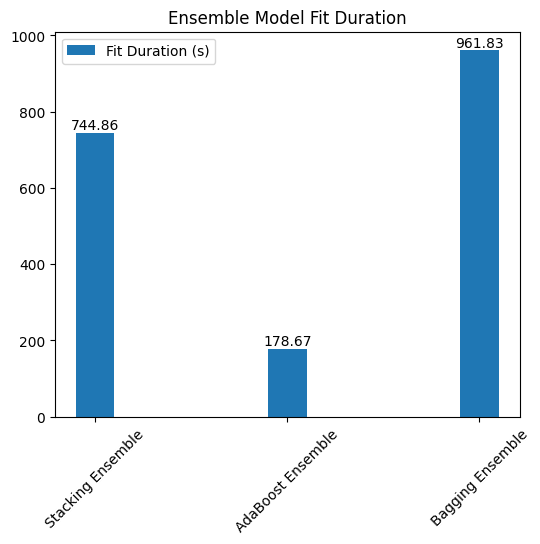

In [11]:
# graph ensemble results via bar chart for fit duration
ensemble_labels = [result["name"] for result in ensemble_results]
ensemble_fit_duration_seconds = [result["fit_duration_seconds"] for result in ensemble_results]

x = range(len(ensemble_labels))

fig, ax = plt.subplots(figsize=(6, 5))
bar_width = 0.2
b1 = ax.bar(x, ensemble_fit_duration_seconds, width=bar_width, label='Fit Duration (s)')
for i in range(len(x)):
    ax.text(i, ensemble_fit_duration_seconds[i], round(ensemble_fit_duration_seconds[i], 2), ha='center', va='bottom')

ax.set_xticks(x)
ax.set_xticklabels(ensemble_labels, rotation=45)
ax.legend()
plt.title('Ensemble Model Fit Duration')
plt.show()

## Summary

In [12]:
import pandas as pd

results_df = pd.DataFrame(results)
ensemble_results_df = pd.DataFrame(ensemble_results)

print('Results:')
print(results_df)
print()
print('Ensemble Results:')
print(ensemble_results_df)
print()

Results:
                  name  accuracy  f1_score  precision    recall  \
0  Logistic Regression  0.500789  0.334210   0.250789  0.500789   
1        Decision Tree  0.634279  0.636343   0.638634  0.634279   
2        Random Forest  0.747037  0.718643   0.737284  0.747037   
3          Naive Bayes  0.500789  0.334210   0.250789  0.500789   
4            LinearSVC  0.500789  0.334210   0.250789  0.500789   

   fit_duration_seconds  
0            236.532971  
1              3.631775  
2            149.321852  
3              0.187368  
4           1419.420144  

Ensemble Results:
                name  accuracy  f1_score  precision    recall  \
0  Stacking Ensemble  0.781864  0.773498   0.772481  0.781864   
1  AdaBoost Ensemble  0.749547  0.720925   0.739355  0.749547   
2   Bagging Ensemble  0.747070  0.714693   0.735945  0.747070   

   fit_duration_seconds  
0            744.861855  
1            178.674768  
2            961.829820  



In [13]:
from sklearn.metrics import classification_report

print('Model Classification Reports:')
for model in models:
    model_name = model[0]
    y_hat = model[1].predict(X_test)
    print(f'{model_name} Classification Report:')
    print(classification_report(y_test, y_hat))
    print()

print('Ensemble Model Classification Reports:')
for ensemble_method, ensemble_model in ensemble_methods:
    y_hat = ensemble_model.predict(X_test)
    print(f'{ensemble_method} Classification Report:')
    print(classification_report(y_test, y_hat))
    print()

Model Classification Reports:
Logistic Regression Classification Report:


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    153658
           1       0.00      0.00      0.00    129629
           2       0.00      0.00      0.00     14610
           3       0.00      0.00      0.00      6561
           4       0.00      0.00      0.00      1240
           5       0.00      0.00      0.00       593
           6       0.00      0.00      0.00       454
           7       0.00      0.00      0.00        79
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3

    accuracy                           0.50    306832
   macro avg       0.05      0.10      0.07    306832
weighted avg       0.25      0.50      0.33    306832


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72    153658
           1       0.60      0.60      0.60    129629
           2       0.27      0.30      0

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.77      0.91      0.83    153658
           1       0.72      0.68      0.70    129629
           2       0.58      0.02      0.05     14610
           3       0.86      0.09      0.17      6561
           4       0.40      0.00      0.01      1240
           5       0.97      0.19      0.32       593
           6       0.38      0.01      0.01       454
           7       0.00      0.00      0.00        79
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3

    accuracy                           0.75    306832
   macro avg       0.47      0.19      0.21    306832
weighted avg       0.74      0.75      0.72    306832


Naive Bayes Classification Report:


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    153658
           1       0.00      0.00      0.00    129629
           2       0.00      0.00      0.00     14610
           3       0.00      0.00      0.00      6561
           4       0.00      0.00      0.00      1240
           5       0.00      0.00      0.00       593
           6       0.00      0.00      0.00       454
           7       0.00      0.00      0.00        79
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3

    accuracy                           0.50    306832
   macro avg       0.05      0.10      0.07    306832
weighted avg       0.25      0.50      0.33    306832


Ensemble Model Classification Reports:
Stacking Ensemble Classification Report:


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.83      0.87      0.85    153658
           1       0.74      0.76      0.75    129629
           2       0.57      0.27      0.37     14610
           3       0.70      0.46      0.55      6561
           4       0.19      0.04      0.07      1240
           5       0.93      0.81      0.87       593
           6       0.24      0.04      0.06       454
           7       0.00      0.00      0.00        79
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3

    accuracy                           0.78    306832
   macro avg       0.42      0.33      0.35    306832
weighted avg       0.77      0.78      0.77    306832


AdaBoost Ensemble Classification Report:


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.77      0.91      0.84    153658
           1       0.72      0.69      0.70    129629
           2       0.60      0.03      0.05     14610
           3       0.83      0.08      0.14      6561
           4       0.29      0.00      0.01      1240
           5       0.97      0.18      0.30       593
           6       0.33      0.01      0.01       454
           7       0.00      0.00      0.00        79
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3

    accuracy                           0.75    306832
   macro avg       0.45      0.19      0.20    306832
weighted avg       0.74      0.75      0.72    306832


Bagging Ensemble Classification Report:


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.77      0.92      0.84    153658
           1       0.72      0.67      0.69    129629
           2       0.59      0.01      0.01     14610
           3       0.84      0.04      0.07      6561
           4       0.00      0.00      0.00      1240
           5       0.98      0.07      0.13       593
           6       0.50      0.00      0.00       454
           7       0.00      0.00      0.00        79
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3

    accuracy                           0.75    306832
   macro avg       0.44      0.17      0.17    306832
weighted avg       0.74      0.75      0.71    306832




c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
